### Selecting dataframe rows and columns

In [1]:
import numpy as np
import pandas as pd

Read the NHANES 2015-2016 data from a file into Pandas

In [2]:
df = pd.read_csv('nhanes_2015_2016.csv')

Get oriented by having a look at the first rows of the data frame

In [3]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In a Pandas dataframe, every column has a name and a datatype. The 'dtypes' method prints these 

In [4]:
df.dtypes

SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object

#### Selecting Columns

Now suppose that we wish to retain only the body measures columns (columns with 'BMX' in its name)

__Option 1__

Directly type the names of all the columns you want to retain and create a literal list

In [5]:
keep = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

__Option 2__

Write a list comprehension to filter the column names according to a selection criterion 

In [6]:
keep2 = [column for column in df.columns if 'BMX' in column]
print(keep2)

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']


__Option 3__

Similar to option 2 but faster and narrower, uses 'startswith'

In [7]:
keep3 = [column for column in df.columns if column.startswith('BMX')]

Below are two equivalent ways to retain columns names in the list keep

In [8]:
df_BMX = df[keep]
df_BMX2 = df.loc[:,keep]

We can confirm that the two results from the preceeding cell are equal:

In [9]:
pd.testing.assert_frame_equal(df_BMX,df_BMX2)

Inspecting our results below, we have

In [10]:
df_BMX.head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


#### Selecting rows

There are many situations where we want to select a subset of the rows in a dataframe, based on one or more conditions.
For example, suppose we want a dataframe that consists only of rows where the value of 'BMXWAIST' is greater than the median BMXWAIST computed over all subjects. We begin by calculating this median 'BMXWAIST'.

In [11]:
waist_median = pd.Series.median(df_BMX['BMXWAIST'])

In [12]:
waist_median

np.float64(98.3)

Now we can select rows where the value of BMXWAIST is greater than the median

In [13]:
df_BMX2 = df_BMX[df_BMX['BMXWAIST']>waist_median]
print(df_BMX.shape)
print(df_BMX2.shape)
df_BMX2.head()

(5735, 7)
(2677, 7)


,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
9,108.3,179.4,33.6,46.0,44.1,38.5,116.0


Lets add another condition, that BMXLEG must be less than 32:

In [14]:
condition1 = df_BMX['BMXWAIST']>waist_median
condition2 = df_BMX['BMXLEG']<32
df_BMX2 = df_BMX[condition1 & condition2]
print(df_BMX2.shape)
df_BMX2.head()

(163, 7)


,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


__Using Query__

The query function in Pandas is a powerful and flexible way to select dataframe rows. We can use 'query' to cary out the selection implemented above as follows

In [15]:
df_BMX3 = df_BMX.query('BMXWAIST>@waist_median & BMXLEG<32')

Note that when calling the query method, the entire selection expression is a string enclosed in quotation marks. Also, variables from the environment that are part of the query must be prefixed with "@". 

We can confirm that the two approaches give the same result:

In [16]:
pd.testing.assert_frame_equal(df_BMX2,df_BMX3)

### Multivariate Distributions in Python

Sometimes we can get a lot of information about how two variables(or more) relate if we plot them together. This tutorial aims to show how plotting two variables together can give us more information than plotting each one separately may miss

In [17]:
%matplotlib inline

# import the packages we are going to be using
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [18]:
# Don't worry so much about rho is doing here 
# Just know if we have a rho of 1 then we will get a perfectly upward sloping line,
# we will get a perfectly downward slopping line. A rho of 0 will get us a 'cloud'
# of points
r = 0.5

In [20]:
# Don't worry so much about the following three lines of code for now
# this is just getting the data for us to plot
mean = [15,5]
cov = [[1,r],[r,1]]
x,y = np.random.multivariate_normal(mean,cov,400).T

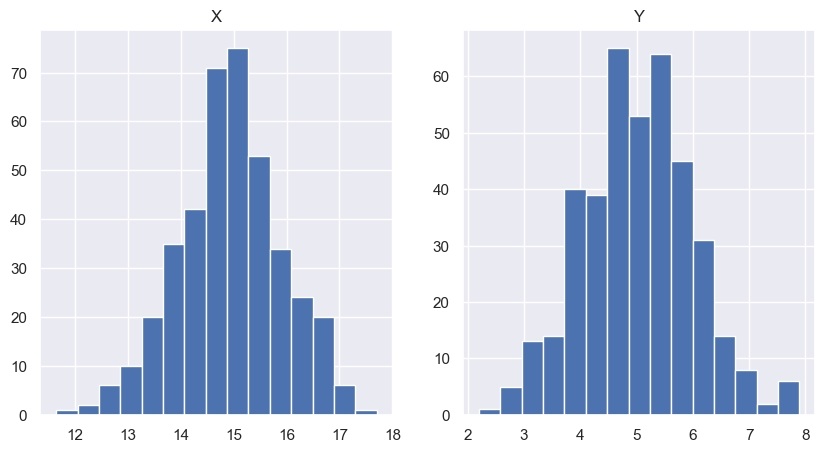

In [21]:
# Adjust the figure size
plt.figure(figsize=(10,5))

# Plot the histograms of X and Y next to each other
plt.subplot(1,2,1)
plt.hist(x=x, bins =15)
plt.title('X')

plt.subplot(1,2,2)
plt.hist(x=y,bins=15)
plt.title('Y')

plt.show()

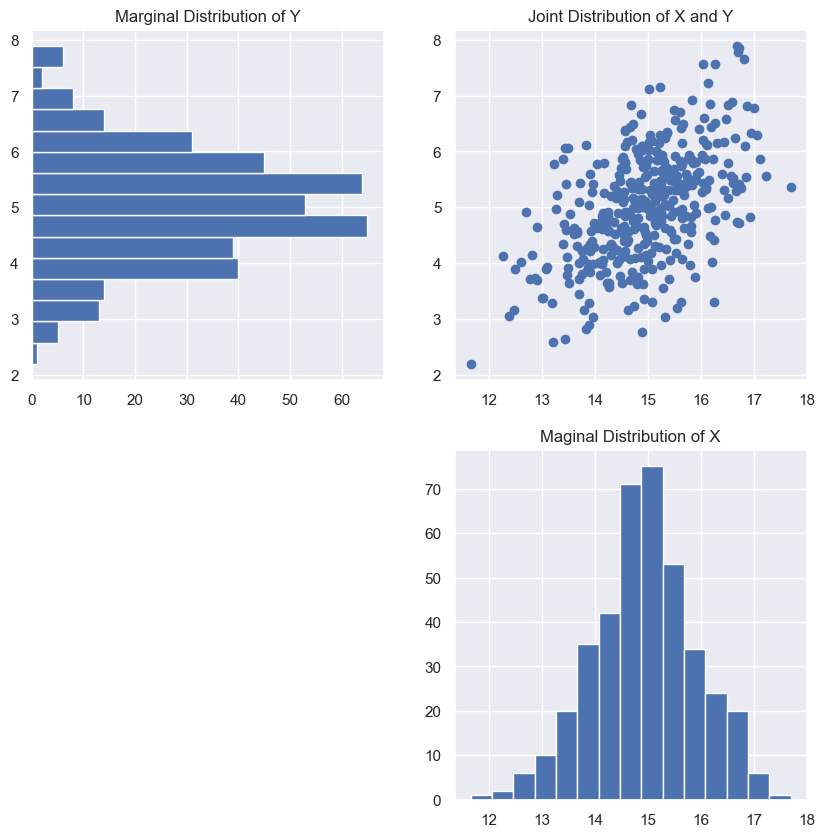

In [25]:
# plot the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x=x,y=y)
plt.title('Joint Distribution of X and Y')

# plot the marginal X distribution
plt.subplot(2,2,4)
plt.hist(x=x, bins = 15)
plt.title('Maginal Distribution of X')

# plot the maginal Y distribution
plt.subplot(2,2,1)
plt.hist(x=y,orientation='horizontal', bins = 15)
plt.title('Marginal Distribution of Y')

# show the plots
plt.show()

#### Testing and Reproducibility for statistical code

A variety of best practices have been developed to give people confidence that their data analysis code is operating correctly. In this book, we review a few strategies.

In [26]:
import numpy as np
import pandas as pd
import matplotlib as plt

Sometimes we can reassure ourselve that our code is correct by using a logical check against a known answer. These checks can be implemented in Python using assert expressions that fail when a given expression is not true and run silently otherwise.

A trivial example of an assert is:

In [27]:
assert 3 == 2+1

As a slightly more interesting example, suppose that we aren't clear what the numpy max function does. We can reassure ourselves by checking its result against an example where the truth is known:

In [28]:
assert np.max([2,3,5]) == 5

#### Testing statistical procedures with simulation

A more interesting example uses simulation to confirm that the result of a procedure that involves random sampling gives results that are close to what is expected.

<u>For example:</u>
We want to check if the numpy.random.normal() function generates data that follows a standard normal distribution (mean = 0, standard deviation = 1). To do this, we:
1. Generate a large sample of numbers using numpy.random.normal().
2. Check if the standard deviation of this sample is close to 1.
3. Use the numpy.allclose() function to see if our result is "close enough" to
the expected value, allowing for some small differences due to randomness.

In [29]:
np.random.seed(123)
assert np.allclose(np.random.normal(size=1000).std(),1,rtol=1e-2,atol=1e-2)

<u>Another example:</u>
A known property of the Poisson distribution is that its population mean and variance are identical. We can check that the sample mean and variance of a random sample from a Poisson distribution are similar.


In [30]:
np.random.seed(123)
x = np.random.poisson(2,size=100000)
assert np.allclose(x.mean(),x.var(),rtol=1e-2,atol=1e-3)

#### Testing Data Manipulation code

Next we consider some ways to reassure us that code involving data manipulation is operating correctly.
Suppose we are analysing the NHANES 2015-2016 data. First we will load the data

In [31]:
# Load the csv file into dataframe
df = pd.read_csv('nhanes_2015_2016.csv')

After loading the data, we may wish to confirm that the sequence variable SEQN (which is supposed to be a unique identifier for each subject) is never missing. This can be done as follows:

In [32]:
assert pd.notnull(df['SEQN']).all()

Suppose further we wish to check that the SEQN variable is indeed unique

In [33]:
assert len(df['SEQN'].unique()) == df.shape[0]

We can also use range checks to confirm that the data are coded as expected. For example, the age variable is top coded at 80, so there should be no values greater than 80 in the data:

In [34]:
assert df['RIDAGEYR'].max()<=80

Suppose we have been told that whenever ALQ101 is missing then ALQ110 must always be missing too. The following assert confirms this:

In [35]:
assert (pd.notnull(df['ALQ101'])|pd.isnull(df['ALQ110'])).all()

Suppose we wish to confirm that all columns of the dataframe have numbers

In [36]:
assert all([np.issubdtype(x,np.number) for x in df.dtypes])